In [0]:
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

1.15.0
2.2.5


In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [0]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# cifar100_classes = [
#     'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
#     'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
#     'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
#     'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
#     'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
#     'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
#     'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
#     'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
#     'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
#     'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
#     'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
#     'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
#     'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
#     'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
#     'worm'
# ]

In [0]:
x_train2 = x_train.reshape(50000, 32 * 32 * 3)
x_test2 = x_test.reshape(10000, 32 * 32 * 3)

In [0]:
x_train2 = (x_train2/255)
x_test2 = (x_test2/255)

y_train2 = keras.utils.to_categorical(y_train,NUM_CLASSES)
y_test2 = keras.utils.to_categorical(y_test,NUM_CLASSES)

In [0]:
y_train 

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
y_train2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten , Dense, Activation, Dropout

In [0]:
model = Sequential()
model.add(Dense(1024, input_shape=(32*32*3, )))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']  # report accuracy during training
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1

In [0]:
batch_size = 128
epochs = 50
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    x_train2, y_train2,  # prepared data
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test2, y_test2),
    shuffle=True,
    # callbacks=[callback],
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 58us/sample - loss: 1.9634 - acc: 0.2751 - val_loss: 1.8166 - val_acc: 0.3430
Epoch 2/50
50000/50000 [==============================] - 2s 43us/sample - loss: 1.7768 - acc: 0.3568 - val_loss: 1.7025 - val_acc: 0.3806
Epoch 3/50
50000/50000 [==============================] - 2s 41us/sample - loss: 1.7015 - acc: 0.3818 - val_loss: 1.6956 - val_acc: 0.3929
Epoch 4/50
50000/50000 [==============================] - 2s 42us/sample - loss: 1.6449 - acc: 0.4069 - val_loss: 1.6139 - val_acc: 0.4253
Epoch 5/50
50000/50000 [==============================] - 2s 41us/sample - loss: 1.5895 - acc: 0.4290 - val_loss: 1.5538 - val_acc: 0.4419
Epoch 6/50
50000/50000 [==============================] - 2s 41us/sample - loss: 1.5484 - acc: 0.4407 - val_loss: 1.5207 - val_acc: 0.4589
Epoch 7/50
50000/50000 [==============================] - 2s 41us/sample - loss: 1.5118 - acc: 0.4566 - val_loss: 1.

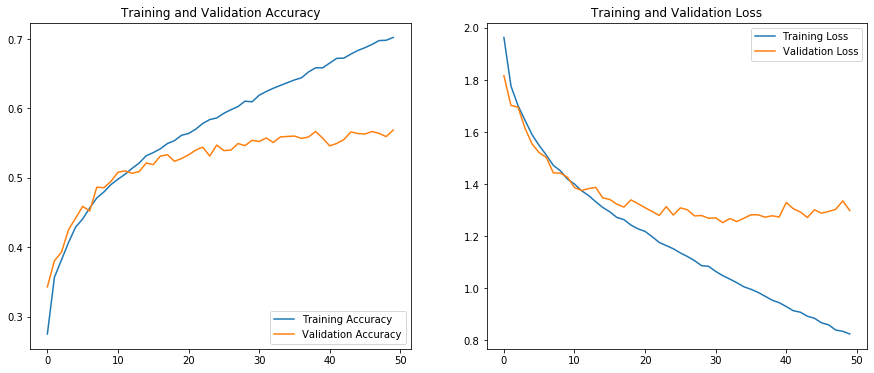

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [0]:
y_pred_test = model.predict_proba(x_test2)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

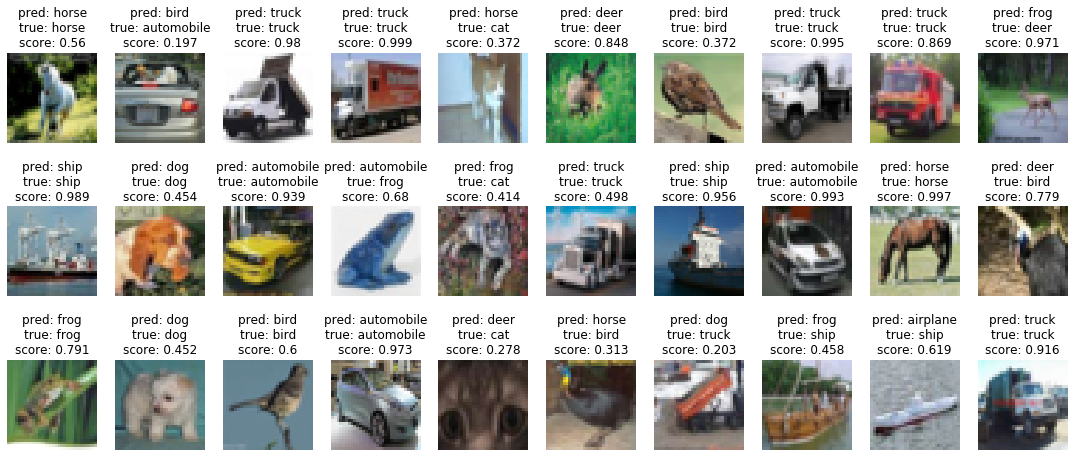

In [0]:
cols = 10
rows = 3
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label =  cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\ntrue: {}\nscore: {:.3}".format(
               pred_label, true_label, pred_proba
        ))
plt.show()

In [0]:
path = 'saved_model/'
model.save(path, save_format='tf')

INFO:tensorflow:Assets written to: saved_model/assets


In [0]:
model = tf.keras.models.load_model(path)

model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']  # report accuracy during training
)

y_pred_test = model.predict_proba(x_test2)

In [0]:
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [0]:
y_pred_test_max_probas

array([0.3861214 , 0.90538347, 0.4034569 , ..., 0.39336565, 0.43148562,
       0.9002139 ], dtype=float32)